# Monty Hall Problem

The Monty Hall Problem is a probability puzzle based on the American television game show 'Let's Make a Deal' and named after the host Monty Hall. The problem became famous mostly because of a question from a reader to the Parade magazine in the 'Ask Marilyn' column.

The Description of the Problem:
***
Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?"

***

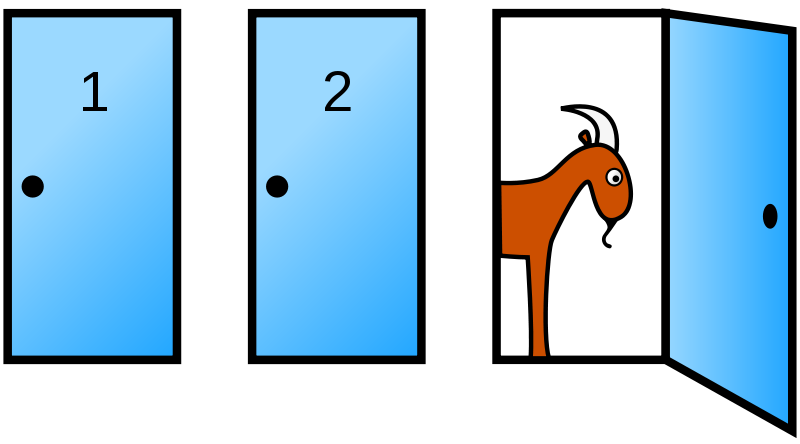

The host give the player an options to switch the first choice door, now the dilemma is: What is the optmal choice? Player should keep the first choice? Switch doors? Is there any difference?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

In [2]:
NDoors = 3
door = [x for x in range(1,NDoors+1)]
N = 100000

Prize = []
FirstChoice = []
RemovedDoor = []
SwitchingDoors = []


for i in range(0,N):
    
    #Selectiong witch Door the Prize will be
    Prize.append(random.choice(door))
    FirstChoice.append(random.choice(door))
    
    #Removing the Door with the prize from the pool of Doors to be open
    PoolToRemove = door.copy()
    PoolToRemove.remove(Prize[i])
    if (Prize[i]!=FirstChoice[i]):
        PoolToRemove.remove(FirstChoice[i])
    RemovedDoor.append(random.choice(PoolToRemove))
    
    #Removing a Door from the pool for switching
    PoolToSwitching = door.copy()
    PoolToSwitching.remove(FirstChoice[i])
    PoolToSwitching.remove(RemovedDoor[i])
    SwitchingDoors.append(random.choice(PoolToSwitching))

Prize = np.array(Prize)
FirstChoice = np.array(FirstChoice)
SwitchingDoors = np.array(SwitchingDoors)

SwitchingWins = (Prize==SwitchingDoors).sum()
KeepingWins = (Prize==FirstChoice).sum()

print(f'The Percentage of Winnings when the Player decides to keep the door is: {round(100*KeepingWins/N,2)}%')
print(f'The Percentage of Winnings when the Player decides to switch the door is: {round(100*SwitchingWins/N,2)}%')

The Percentage of Winnings when the Player decides to keep the door is: 33.25%
The Percentage of Winnings when the Player decides to switch the door is: 66.75%


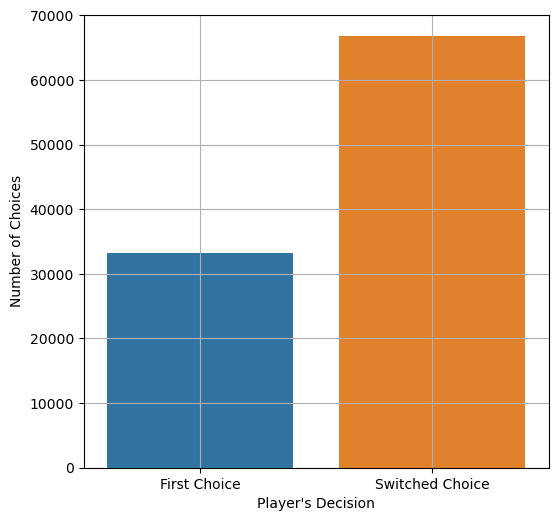

In [3]:
fig = plt.figure(figsize=(6,6),dpi = 100)

label = ['First Choice', 'Switched Choice']
values = [KeepingWins,SwitchingWins]
sns.barplot(x=label,y=values)
plt.grid()
plt.xlabel('Player\'s Decision')
plt.ylabel('Number of Choices')
plt.show()

In [4]:
SwitchingWins = []
KeepingWins= []

for NDoors in range(3,101):
    door = [x for x in range(1,NDoors+1)]
    N = 100000

    Prize = []
    FirstChoice = []
    RemovedDoor = []
    SwitchingDoors = []


    for i in range(0,N):
        
        #Selectiong witch Door the Prize will be
        Prize.append(random.choice(door))
        FirstChoice.append(random.choice(door))
        
        #Removing the Door with the prize from the pool of Doors to be open
        PoolToRemove = door.copy()
        PoolToRemove.remove(Prize[i])
        if (Prize[i]!=FirstChoice[i]):
            PoolToRemove.remove(FirstChoice[i])
        RemovedDoor.append(random.choice(PoolToRemove))
        
        #Removing a Door from the pool for switching
        PoolToSwitching = door.copy()
        PoolToSwitching.remove(FirstChoice[i])
        PoolToSwitching.remove(RemovedDoor[i])
        SwitchingDoors.append(random.choice(PoolToSwitching))
    
    Prize = np.array(Prize)
    FirstChoice = np.array(FirstChoice)
    SwitchingDoors = np.array(SwitchingDoors)

    SwitchingWins.append(100*(Prize==SwitchingDoors).sum()/N)
    KeepingWins.append(100*(Prize==FirstChoice).sum()/N)
SwitchingWins = np.array(SwitchingWins)
KeepingWins = np.array(KeepingWins)

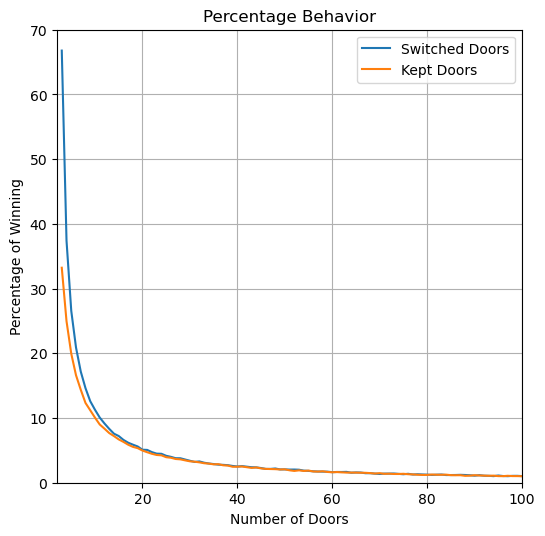

In [5]:

fig = plt.figure(figsize=(6,6), dpi = 100)

Doors = np.array(range(3,101))
sns.lineplot(x = Doors, y = SwitchingWins)
sns.lineplot(x = Doors, y = KeepingWins)
plt.legend(['Switched Doors','Kept Doors'])
plt.title('Percentage Behavior')
plt.xlabel('Number of Doors')
plt.ylabel('Percentage of Winning')
plt.xlim((2,100))
plt.ylim((0,70))
plt.grid()
plt.show()